In [1]:
import pandas as pd
import json
import seaborn as sns

In [36]:
matches = []
for i in range(1,101):
    if i ==1:
        tmp = json.loads(open('match{}.json'.format(i), 'r').read())['matches']
    else:
        try:
            tmp = json.loads('{"matches": [' + open('match{}.json'.format(i), 'r').read())['matches']
        except:
            tmp = json.loads('{"matches": [' + open('match{}.json'.format(i), 'r').read()[:-2]+']}')['matches']
    
    if i%10==0:
        print(i)
    
    matches.extend(tmp)

10
20
30
40
50
60
70
80
90
100


In [40]:
tmp[0]

{'gameId': 3455274600,
 'platformId': 'KR',
 'gameCreation': 1544629698203,
 'gameDuration': 2250,
 'queueId': 440,
 'mapId': 11,
 'seasonId': 11,
 'gameVersion': '8.24.255.8524',
 'gameMode': 'CLASSIC',
 'gameType': 'MATCHED_GAME',
 'teams': [{'teamId': 100,
   'win': 'Fail',
   'firstBlood': True,
   'firstTower': False,
   'firstInhibitor': False,
   'firstBaron': False,
   'firstDragon': False,
   'firstRiftHerald': False,
   'towerKills': 5,
   'inhibitorKills': 0,
   'baronKills': 0,
   'dragonKills': 1,
   'vilemawKills': 0,
   'riftHeraldKills': 0,
   'dominionVictoryScore': 0,
   'bans': [{'championId': 157, 'pickTurn': 1},
    {'championId': 142, 'pickTurn': 2},
    {'championId': 555, 'pickTurn': 3},
    {'championId': 236, 'pickTurn': 4},
    {'championId': 7, 'pickTurn': 5}]},
  {'teamId': 200,
   'win': 'Win',
   'firstBlood': False,
   'firstTower': True,
   'firstInhibitor': True,
   'firstBaron': True,
   'firstDragon': True,
   'firstRiftHerald': True,
   'towerKills'

In [37]:
len(matches)

6676

In [42]:
fout = open('match.json', 'w') 
fout.write(json.dumps({'match': matches}, ensure_ascii=False))
fout.close()

In [45]:
zilean = []

for match in matches:
    if match['gameMode']!='CLASSIC':
        pass
    else:
        for participant in match['participants']:
            if participant['championId'] == 26:
                zilean.append(participant)

len(zilean)

140

In [46]:
140/len(matches)

0.020970641102456562

In [59]:
count_support = 0
count_mid = 0
count_else = 0

for z in zilean:

    
    if z['timeline']['role'] =='DUO_SUPPORT':
        count_support += 1
    elif z['timeline']['role'] =='MID':
        count_mid += 1
    else:
        count_else += 1

(count_support, count_mid, count_else)

(101, 0, 39)

In [96]:
zilean[15]['stats']

{'participantId': 3,
 'win': False,
 'item0': 3092,
 'item1': 2003,
 'item2': 2055,
 'item3': 1004,
 'item4': 2422,
 'item5': 0,
 'item6': 3364,
 'kills': 0,
 'deaths': 0,
 'assists': 0,
 'largestKillingSpree': 0,
 'largestMultiKill': 0,
 'killingSprees': 0,
 'longestTimeSpentLiving': 0,
 'doubleKills': 0,
 'tripleKills': 0,
 'quadraKills': 0,
 'pentaKills': 0,
 'unrealKills': 0,
 'totalDamageDealt': 8864,
 'magicDamageDealt': 8028,
 'physicalDamageDealt': 835,
 'trueDamageDealt': 0,
 'largestCriticalStrike': 0,
 'totalDamageDealtToChampions': 3427,
 'magicDamageDealtToChampions': 2953,
 'physicalDamageDealtToChampions': 473,
 'trueDamageDealtToChampions': 0,
 'totalHeal': 660,
 'totalUnitsHealed': 1,
 'damageSelfMitigated': 757,
 'damageDealtToObjectives': 59,
 'damageDealtToTurrets': 59,
 'visionScore': 14,
 'timeCCingOthers': 8,
 'totalDamageTaken': 2030,
 'magicalDamageTaken': 695,
 'physicalDamageTaken': 1180,
 'trueDamageTaken': 155,
 'goldEarned': 2928,
 'goldSpent': 2350,
 'tur

In [99]:
stats = []

for z in zilean:

    if z['stats']['firstBloodKill'] ==  True:
        z['stats']['firstBloodKill'] = 1
    else:
        z['stats']['firstBloodKill'] = 0
    
    if z['stats']['firstBloodAssist'] ==  True:
        z['stats']['firstBloodAssist'] = 1
    else:
        z['stats']['firstBloodAssist'] = 0
        
    try:
        if z['stats']['firstTowerKill'] ==  True:
            z['stats']['firstTowerKill'] = 1
    except:
        z['stats']['firstTowerKill'] = 0
        
    try:
        if z['stats']['firstTowerAssist'] ==  True:
            z['stats']['firstTowerAssist'] = 1
    except:
        z['stats']['firstTowerAssist'] = 0
        
    if z['stats']['win'] ==  True:
        z['stats']['win'] = 1
    else:
        z['stats']['win'] = 0    
    
    stats.append(z['stats'])
    
stats = pd.DataFrame(stats)

In [108]:
stats.head()

,assists,champLevel,combatPlayerScore,damageDealtToObjectives,damageDealtToTurrets,damageSelfMitigated,deaths,doubleKills,firstBloodAssist,firstBloodKill,...,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,turretKills,unrealKills,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win
0,10,11,0,3267,2768,2450,1,0,0,0,...,0,0,22,0,0,47,5,7,20,1
1,1,12,0,142,142,3391,8,0,0,0,...,717,717,1579,0,0,25,5,7,9,0
2,10,11,0,565,565,5344,6,0,0,0,...,805,431,273,0,0,23,2,1,11,0
3,15,17,0,3661,3351,11604,6,0,0,0,...,13195,0,2253,1,0,33,1,6,11,1
4,2,10,0,840,840,2641,2,1,0,0,...,507,417,39,0,0,14,4,1,8,1


In [114]:
stats = stats.fillna(0)

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

C:\Programming\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [115]:
X_train, X_test, y_train, y_test = train_test_split(stats.drop('win', axis = 1).values, stats.win, test_size = 0.1, random_state = 42)

In [116]:
regressor = GradientBoostingRegressor()
regressor.fit(X = X_train, y = y_train)
regressor.score(X_test, y_test)

0.35108654318139454

In [121]:
from xgboost import XGBClassifier

In [122]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [123]:
print(model.feature_importances_)

[0.1309255  0.         0.         0.05417607 0.06320542 0.02708804
 0.07674944 0.         0.         0.         0.         0.
 0.         0.         0.00225734 0.00902935 0.00225734 0.01580136
 0.00451467 0.0248307  0.         0.02031603 0.01354402 0.
 0.         0.         0.         0.         0.         0.02934537
 0.00451467 0.00902935 0.0248307  0.00451467 0.00225734 0.
 0.         0.00225734 0.         0.00677201 0.00225734 0.01354402
 0.         0.         0.         0.01580136 0.         0.00451467
 0.01580136 0.         0.         0.00225734 0.         0.
 0.         0.01128668 0.         0.         0.         0.
 0.         0.01805869 0.         0.         0.         0.04063205
 0.03611738 0.02934537 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.05643341 0.         0.         0.01805869
 0.         0.00902935 0.03837472 0.00677201 0.01805869 0.
 0.         0.01805869 0.02257336 0.         0.04063205 0.0

In [124]:
from xgboost import plot_importance

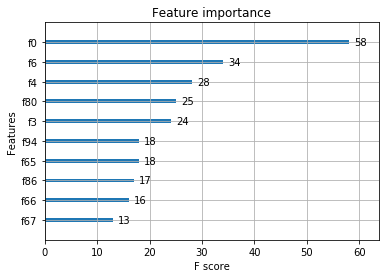

In [133]:
plot_importance(model, max_num_features=10)

In [152]:
idx = np.argsort(model.feature_importances_)[len(model.feature_importances_):-11:-1]
stats.columns[idx]

Index(['assists', 'deaths', 'damageDealtToTurrets', 'statPerk0',
       'damageDealtToObjectives', 'physicalDamageDealt', 'trueDamageDealt',
       'totalDamageTaken', 'physicalDamageDealtToChampions',
       'physicalDamageTaken'],
      dtype='object')

In [128]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
accuracy_score(y_test,pred)

C:\Programming\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7142857142857143